In [841]:
import os
import pandas as pd 
from bs4 import BeautifulSoup
from IPython.display import clear_output

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import ward, dendrogram,linkage



In [813]:
titles = [
"DICTIONARY GREEK AND ROMAN GEOGRAPHY",
"THE HISTORY OF TACITUS, VOL5",
"THE HISTORY OF THE PELOPONNESIAN WAR 1",
"THE HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE 1",
"THE HISTORY OF ROME 1",
"THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS",
"THE HISTORY OP THE DECLINE AND FALL OF THE ROMAN EMPIRE 2",
"THE DESCRIPTION OF GREECE",
"THE HISTORY OF ROME 2",
"HISTORY OF ROME 3",
"THE HISTORY OF THE PELOPONNESIAN WAR 2",
"HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE 3",
"HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE 4",
"THE ANNALS OF TACITUS",
"ROMAN HISTORY",
"THE WARS OF THE JEWS; OR, THE HISTORY OF THE DESTRUCTION OF JERUSALEM",
"THE WORKS OF CORNELIUS TACITUS",
"HISTORY OF ROME 4",
"THE ANTIQUITIES OF THE JEWS",
"THE FIRST AND THIRTY-THIRD BOOKS OF PLINY'S NATURAL HISTORY",
"THR HISTORY OF THE THE ROMAN EMPIRE",
"THE HISTORIES CAIUS COBNELIUS TACITUS: NOTES FOR COLLEGES",
"HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE 5",
"""THE WORKS OF FLAVIUS JOSEPHUS, THE LEARNED AND AUTHENTIC
    JEWISH HISTORIAN, AND CELEBRATED WARRIOR"""
]

authors = [
"WILLIAM_SMITH_LLD",
"ARTHUR_MURPHY",
"WILLIAM_SMITH",
"EDWARD_GIBBON",
"TITUS_LIVIUS",
"WILLIAM_WHISTON",
"EDWARD_GIBBON",
"PAUS_ANIAS",
"THEODOR_MOMMSEN",
"GEORGE_BAKER",
"WILLIAM_SMITH",
"THOMAS_BOWDLER",
"THOMAS_BOWDLER",
"ARTHUR_MURPHY",
"WILLIAM_GORDON",
"WILLIAM_WHISTON",
"ARTHUR_MURPHY",
"GEORGE_BAKER",
"FLAVIUS_JOSEPHU",
"JOHN_BOSTOCK",
"J_F_Dove",
"K_TYLER",
"EDWARD_GIBBON",
"FLAVIUS_JOSEPHU"
]

In [63]:
books = pd.DataFrame(columns = ['book', 'content']) 
book_nr = 0

for root,dirs,files in os.walk('gap-html', topdown=True): 
      
    pages = ""    
    for file in files:
        print("at book " + root, " and at file " + file)
        soup = BeautifulSoup(open(root + "/" + file), 'html.parser')
       
        tags = soup.select(".ocr_cinfo")
        inside_tags = [tag.get_text() for tag in tags]
        page = ' '.join(inside_tags)
        if page.strip() != '':
            pages += page + ' '
        
        clear_output(wait=True)
    
    if pages != "":
        books.loc[book_nr] = [root, pages]    
        book_nr += 1 


at book gap-html\gap_y-AvAAAAYAAJ  and at file 00000456.html


In [64]:
print(books)

                         book  \
0   gap-html\gap_-C0BAAAAQAAJ   
1   gap-html\gap_2X5KAAAAYAAJ   
2   gap-html\gap_9ksIAAAAQAAJ   
3   gap-html\gap_aLcWAAAAQAAJ   
4   gap-html\gap_Bdw_AAAAYAAJ   
5   gap-html\gap_CnnUAAAAMAAJ   
6   gap-html\gap_CSEUAAAAYAAJ   
7   gap-html\gap_DhULAAAAYAAJ   
8   gap-html\gap_dIkBAAAAQAAJ   
9   gap-html\gap_DqQNAAAAYAAJ   
10  gap-html\gap_fnAMAAAAYAAJ   
11  gap-html\gap_GIt0HMhqjRgC   
12  gap-html\gap_IlUMAQAAMAAJ   
13  gap-html\gap_MEoWAAAAYAAJ   
14  gap-html\gap_m_6B1DkImIoC   
15  gap-html\gap_ogsNAAAAIAAJ   
16  gap-html\gap_pX5KAAAAYAAJ   
17  gap-html\gap_RqMNAAAAYAAJ   
18  gap-html\gap_TgpMAAAAYAAJ   
19  gap-html\gap_udEIAAAAQAAJ   
20  gap-html\gap_VPENAAAAQAAJ   
21  gap-html\gap_WORMAAAAYAAJ   
22  gap-html\gap_XmqHlMECi6kC   
23  gap-html\gap_y-AvAAAAYAAJ   

                                              content  
0   800020427L   â–º   ZOI5 DICTIONARY GREEK AND R...  
1   CReSlorecl through a arant in from ( The Cartw...  
2   W 

In [61]:
#save
file_name = "books-panda"
books.to_pickle(file_name)

In [ ]:
#load 
books = pd.read_pickle(file_name)

In [168]:
def tokenize_and_stem(book_content):
    
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    stemmer = PorterStemmer()
    
    tokens = tokenizer.tokenize(book_content.lower())
    stems = [stemmer.stem(i) for i in tokens]
    
    return stems

In [54]:
res = clean_data(books.iloc[1,1])

In [164]:
books['content'].shape

(24,)

In [193]:
def get_term_freq_sorted(content):
    
    vectorizer = CountVectorizer(tokenizer=tokenize_and_stem)
    transformed_data = vectorizer.fit_transform(content)
    
    feature_names = vectorizer.get_feature_names()
    freq =  np.ravel(transformed_data.sum(axis=0))
    
    zipped = list(zip(feature_names, freq)) 
    res = sorted(zipped, key = lambda x: x[1]) 
    
    return res


In [194]:
tf_books = get_term_freq_sorted(books['content'])

In [869]:
#getting last 30 most used words and reversing the list
ys = [t[1] for t in tf_books[-100:] ] [::-1]
xs = [t[0] for t in tf_books[-100:] ] [::-1]

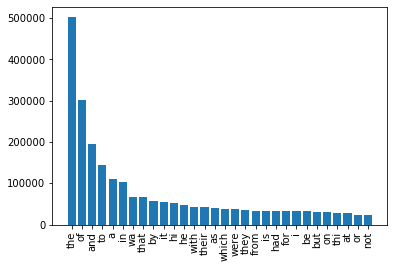

In [871]:
plt.bar(xs[:30], ys[:30])
plt.xticks(rotation='vertical');
plt.savefig('word-histogram.png')

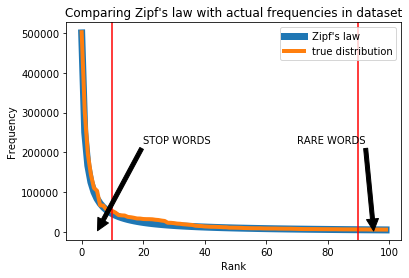

In [872]:

fig = plt.figure()
ax = fig.add_subplot(111)


#to compare with inverse law
x = range(100)
y = 500000/(np.array(x)+1)
plt.plot(x, y, label =  "Zipf's law",linewidth = 7);

plt.plot(range(100), ys, label =  "true distribution",linewidth = 4)

plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Comparing Zipf's law with actual frequencies in dataset")

plt.axvline(x= 10, color = 'r');
plt.axvline(x= 90, color = 'r');
plt.legend(loc="upper right")

ax.annotate('STOP WORDS', xy=(5, 800), xytext=(20,222000), arrowprops=dict(facecolor='black', shrink=0.01));
ax.annotate('RARE WORDS', xy=(95, 100), xytext=(70,222000), arrowprops=dict(facecolor='black', shrink=0.01));

plt.savefig('Zipflaw.png')

In [732]:
#only 150000 dimensions for k means works the best
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=150000,
                                  min_df=0.1, stop_words='english',
                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

#the warning comes from words that are misspelled
%time tfidf_matrix_kmeans = tfidf_vectorizer.fit_transform(books['content'])


C:\Users\Ieremie\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'st

Wall time: 2min 37s


In [635]:
#use all features for the dimension scalling
tfidf_vectorizer = TfidfVectorizer(max_df=0.7,
                                  min_df=0.1, stop_words='english',
                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

#the warning comes from words that are misspelled
%time tfidf_matrix = tfidf_vectorizer.fit_transform(books['content'])

C:\Users\Ieremie\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'st

Wall time: 2min 29s


In [309]:
a = tfidf_vectorizer.get_feature_names()
len(a)

100000

In [877]:
elbow = []
ks = range(1,20)
for k in ks:
    
    km = KMeans(n_clusters=k)
    print("k equals = ", k)
    km = km.fit(tfidf_matrix)   
    elbow.append(km.inertia_)
    clear_output(wait=True)

k equals =  19


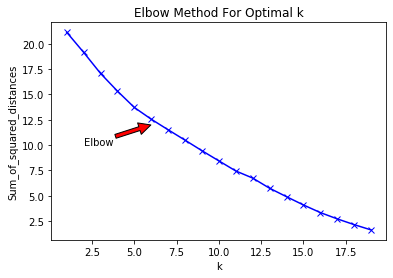

In [880]:

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(ks, elbow, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
ax.annotate('Elbow', xy=(6, 12), xytext=(2,10), arrowprops=dict(facecolor='red', shrink=0.01))


plt.savefig('elbow.png')
plt.show()

In [733]:
#best k is where the elbow appears
km = KMeans(n_clusters=6)
km = km.fit(tfidf_matrix_kmeans) 

In [865]:
#getting distance matrix
dist_matrix = 1 - cosine_similarity(tfidf_matrix)
mds = MDS(n_components=2,n_init = 5, dissimilarity="precomputed")
pos = mds.fit_transform(dist_matrix) 
#x and y coordinates in 2 dimensional space
xs, ys = pos[:, 0], pos[:, 1]

In [804]:
tsne = TSNE(perplexity=50.0, learning_rate=200.0, n_iter=250, 
            n_iter_without_progress=600, metric='cosine',
            verbose=0, method='barnes_hut')

tsne_results = tsne.fit_transform(dist_matrix)

In [805]:
clustered_books = pd.DataFrame(columns = ['book', 'cluster', 'title', 'author', "x-MDS", "y-MDS", "x-TSNE", "y-TSNE"])
clustered_books['book'] = books['book']
clustered_books['cluster'] =  km.labels_.tolist()
clustered_books['title'] = titles
clustered_books['author'] =  authors
clustered_books['x-MDS'] = xs
clustered_books['y-MDS'] =  ys
clustered_books['x-TSNE'] = tsne_results[:,0]
clustered_books['y-TSNE'] =  tsne_results[:,1]

In [806]:
clustered_books = clustered_books.sort_values(by ='cluster')
clustered_books.reset_index(drop=True, inplace=True)
clustered_books


,book,cluster,title,author,x-MDS,y-MDS,x-TSNE,y-TSNE
0,gap-html\gap_9ksIAAAAQAAJ,0,THE HISTORY OF THE PELOPONNESIAN WAR 1,WILLIAM_SMITH,-0.361782,-0.623848,0.204395,2.570204
1,gap-html\gap_fnAMAAAAYAAJ,0,THE HISTORY OF THE PELOPONNESIAN WAR 2,WILLIAM_SMITH,-0.442218,-0.521646,8.765044,-6.480665
2,gap-html\gap_y-AvAAAAYAAJ,1,"THE WORKS OF FLAVIUS JOSEPHUS, THE LEARNED AND...",FLAVIUS_JOSEPHU,0.629706,-0.118349,-3.171930,13.442703
3,gap-html\gap_TgpMAAAAYAAJ,1,THE ANTIQUITIES OF THE JEWS,FLAVIUS_JOSEPHU,0.584845,0.066100,-1.844367,-5.996552
4,gap-html\gap_ogsNAAAAIAAJ,1,"THE WARS OF THE JEWS; OR, THE HISTORY OF THE D...",WILLIAM_WHISTON,0.450077,-0.053073,6.231071,8.035065
5,gap-html\gap_CnnUAAAAMAAJ,1,THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS,WILLIAM_WHISTON,0.654550,-0.008683,12.166051,5.269935
6,gap-html\gap_VPENAAAAQAAJ,2,THR HISTORY OF THE THE ROMAN EMPIRE,J_F_Dove,-0.644960,-0.069717,-6.551916,1.982317
7,gap-html\gap_IlUMAQAAMAAJ,2,HISTORY OF THE DECLINE AND FALL OF THE ROMAN E...,THOMAS_BOWDLER,-0.375198,-0.043915,3.753724,10.804270
8,gap-html\gap_XmqHlMECi6kC,2,HISTORY OF THE DECLINE AND FALL OF THE ROMAN E...,EDWARD_GIBBON,-0.605148,0.246573,5.760588,6.765415
9,gap-html\gap_GIt0HMhqjRgC,2,HISTORY OF THE DECLINE AND FALL OF THE ROMAN E...,THOMAS_BOWDLER,-0.604664,-0.036388,6.121140,-6.681576


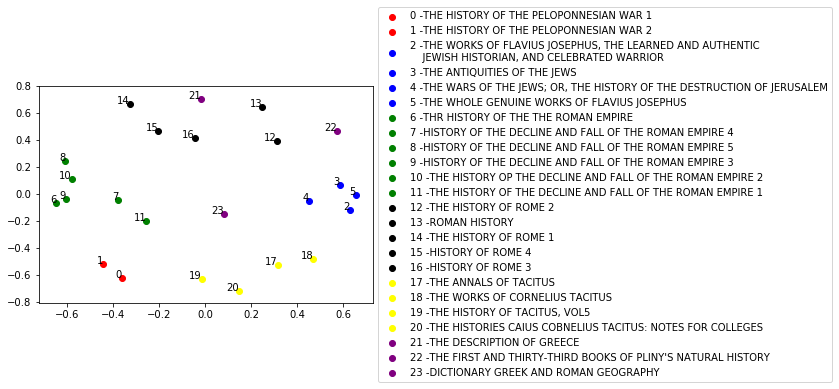

In [881]:
colors = ["red","blue", "green", "black", "yellow", "purple"]
cluster_colors = [ colors[t] for t in clustered_books['cluster'] ]


for i in range(24):
    plt.scatter(clustered_books['x-MDS'][i], clustered_books['y-MDS'][i], c = cluster_colors[i], label =  str(i) + " -" + clustered_books['title'][i])
    plt.annotate(str(i), 
                 (clustered_books['x-MDS'][i], clustered_books['y-MDS'][i]),
                 ha='right') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('mds.png')
plt.show()

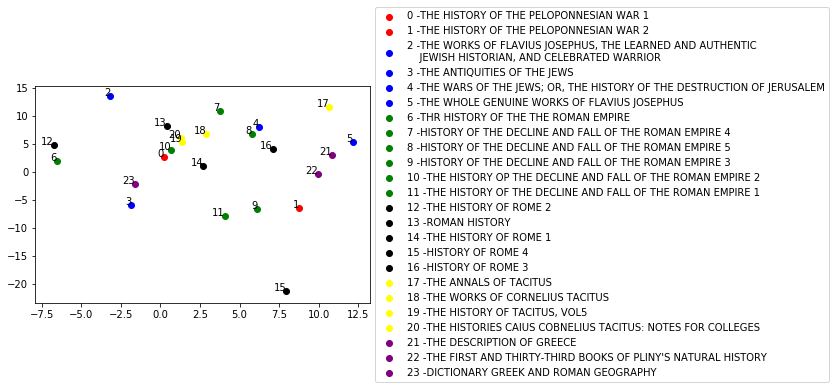

In [882]:
for i in range(24):
    plt.scatter(clustered_books['x-TSNE'][i], clustered_books['y-TSNE'][i], c = cluster_colors[i], label =  str(i) + " -" + clustered_books['title'][i])
    plt.annotate(str(i), # this is the text
                 (clustered_books['x-TSNE'][i], clustered_books['y-TSNE'][i]),
                 ha='right') # horizontal alignment can be left, right or center
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('tsne.png')
plt.show()

C:\Users\Ieremie\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


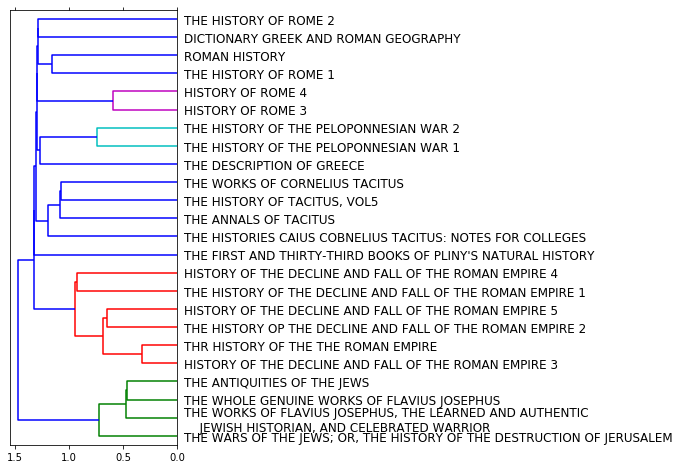

In [893]:
linked = linkage(dist_matrix, 'single')

fig, ax = plt.subplots(figsize=(3, 8)) # set size
ax = dendrogram(linked, orientation="left", labels=titles, leaf_font_size=12);

plt.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')

plt.tight_layout()
plt.savefig('dendoSIngle.png')